# Quantum classifier  

In this notebook, you will apply your knowledge of quantum computing to machine learning. In particular, We ask you to implement classical and quantum version of the classification models, **Support vector machines** and **Variational Quantum Classifier** respectively. In this exercises we will use `Breast cancer` [dataset](https://www.kaggle.com/datasets/merishnasuwal/breast-cancer-prediction-dataset), as it contains few features and the classification is binary. This facilitates the training of the quantum model.


This exercise is divided in the following parts:
1. Data processing
2. Training and evaluating the classical model
3. Training and evaluating the quantum model
4. Perform dimenstion reduction

## 1. Data processing  
In this part you should get familiar with the dataset. To this end, you should investigate the data, perform any kind of preprocessing if you consider it necessary, and visuzalize the data.

In [131]:
# todo load the data the print the first rows

In [ ]:
# todo normalize the data

In [178]:
# todo visualize the data

## 2. Train the classical model  
We are not analyzing in depth the classical model, since teaching the classical SVM model is not the goal of this exercise. We are going to use implemented functions for splitting data, training and validating the model from  `Sklearn` library.

In order to evaulete the perfomance of the model, we ask you to split the data in training and test datasets.

In [163]:
# todo split the data in training and test

We ask you to train and evaluate the classical SVM algorithm.

In [172]:
# todo train the model

In [179]:
# todo evaluate the model

## 3. Training a Quantum Machine Learning Model

As an example of a quantum model, we'll train a variational quantum classifier (VQC). The VQC is the simplest classifier available in Qiskit Machine Learning and is a good starting point for newcomers to quantum machine learning who have a background in classical machine learning.

But before we train a model, let's examine what comprises the `VQC` class. Two of its central elements are the **feature map** and **ansatz**. What these are will now be explained.

Our data is classical, meaning it consists of a set of bits, not qubits. We need a way to encode the data as qubits. This process is crucial if we want to obtain an effective quantum model. We usually refer to this mapping as data encoding, data embedding, or data loading and this is the role of the feature map. While feature mapping is a common ML mechanism, this process of loading data into quantum states does not appear in classical machine learning as that only operates in the classical world.

Once the data is loaded, we must immediately apply a parameterized quantum circuit. This circuit is a direct analog to the layers in classical neural networks. It has a set of tunable parameters or weights. The weights are optimized such that they minimize an objective function. This objective function characterizes the distance between the predictions and known labeled data. A parameterized quantum circuit is also called a parameterized trial state, variational form, or ansatz. Perhaps, the latter is the most widely used term.

For more information, we direct the reader to the [Quantum Machine Learning Course](https://learn.qiskit.org/course/machine-learning).

Many classical machine learning methods re-express their input data in a different space to make it easier to work with, or because the new space may have some convenient properties. A common example is support vector machines, which classify data using a linear hyperplane. A linear hyperplane works well when the data is already linearly separable in the original space, however this is unlikely to be true for many data sets. To work around this it may be possible to transform the data into a new space where it is linear by way of a feature map.


More formally, let $X$ be a set of input data. A feature map $\phi$ is a function that acts as $\phi:X \rightarrow F$ where $F$ is the feature space. The outputs of the map on the individual data points, $\phi(𝑥)$ for all $x \in X$, are called feature vectors.

![feature_map_svm.svg](images/feature_map_svm.svg)


In general $F$ is just a vector space — a quantum feature map $\phi:X \rightarrow F$ is a feature map where the vector space $F$ is a Hilbert space and the feature vectors are quantum states. The map transforms $𝑥 \rightarrow |\phi(𝑥) \rangle$ by way of a unitary transformation $U_{\phi(𝑥}$, which is typically a variational circuit whose parameters depend on the input data.

![quantum_feature_map.svg](images/quantum_feature_map.svg)

First, we ask you to implement feature map: **Second-order Pauli-Z feature map**. The latest applies twice the **Pauli-Z** gate. The formula of $\mathscr{U}_{\phi(x)}$ defines the actual feature map, where $H$ is the hadamard gate. We consider $|S| \leq 2$. The $P_i$ is a Pauli gate defined as $P_i \in \{I, X, Y, Z\}$.


# $$
\mathscr{U}_{\phi(x)} = U_{\phi(x)}H^{\otimes n} U_{\phi(x)}H^{\otimes n} \\
\textrm{where} \\
$$

<div>
    <img src="images/AU.png" width="400"/>
    <img src="images/phase.png" width="450"/>
</div>


You can experiment with original implementation of `ZZFeatureMap` to get more idea of the circuit. 

*Hint*: check `qiskit.circuit.ParameterVector` to create parametrised input

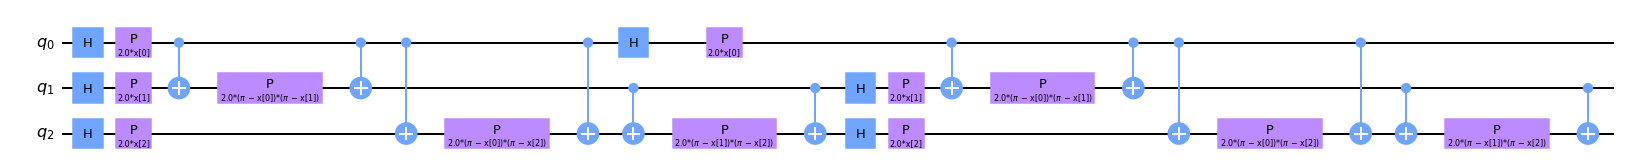

In [171]:
from qiskit.circuit.library import ZZFeatureMap

# experiment with values
number_features = 3
repetitions = 2
feature_map = ZZFeatureMap(feature_dimension=number_features, reps=repetitions)
feature_map.decompose().draw(output="mpl", fold=40) # decrease the value to zoom inro circuit

If you look closely at the feature map diagram, you will notice parameters `x[0], ..., x[2]`. These are placeholders for the features.

In [69]:
# TODO: implement quantum feature map and plot the circuit

def ZZFeatureMap1(feature_dimension, reps=1):
    """
    Produces the Pauli-Z Expansion circuit.
    
    feature_dimension - int, number of qubits
    reps - int, number of repetitions of circuits, 1 by deault
    
    returns - quantum circuit, that representing ZZfeature map.
    """
    pass

Now we create and plot our ansatz. The latest is a parameterized circuit, that can be seen as function $\tilde{f}$ that we use to approximate unknown true function $f$. There are several built-in implementation of variuos ansatz, however we suggest to use `qiskit.circuit.library.RealAmplitudes`.  
Below there is an example of an ansatz. Feel free to experiment with it. We ask you to implement the circuit as `RealAmplitudes`.

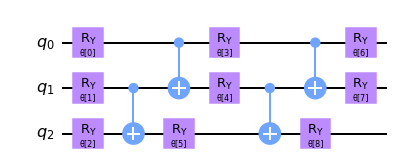

In [141]:
from qiskit.circuit.library import RealAmplitudes

ansatz = RealAmplitudes(num_qubits=number_features, reps=repetitions)
ansatz.decompose().draw(output="mpl", fold=20)

This circuit has 16 parameters named `θ[0], ..., θ[8]`. These are the trainable weights of the classifier.

In [180]:
# TODO: implement ansatz and plot the circuit

def ansatz(num_qubits, reps=1):
    """
    Produces the real-amplitudes 2-local circuit.
    
    num_qubits - int, number of qubits
    reps - int, number of repetitions of circuits, 1 by deault
    
    returns - quantum circuit, that representing real-amplitudes 2-local circuit
    """
    pass


We then choose an optimization algorithm to use in the training process. This step is similar to what you may find in classical deep learning frameworks. To make the training process faster, we choose a gradient-free optimizer. You may explore other optimizers available in Qiskit.

In [2]:
# todo: define optimizer
# optimizer = 

In the next step, we define where to train our classifier. We can train on a simulator or a real quantum computer. Here, we will use a simulator. We create an instance of the `Sampler` primitive. This is the reference implementation that is statevector based. Using qiskit runtime services you can create a sampler that is backed by a quantum computer. The `Sampler` is an estimator of the $\theta$ in our classification system.

In [144]:
from qiskit.primitives import Sampler

sampler = Sampler()

We will add a callback function called `callback_graph`. `VQC` will call this function for each evaluation of the objective function with two parameters: the current weights and the value of the objective function at those weights. Our callback will append the value of the objective function to an array so we can plot the iteration versus the objective function value. The callback will update the plot at each iteration. Note that you can do whatever you want inside a callback function, so long as it has the two-parameter signature we mentioned above.

In [145]:
from matplotlib import pyplot as plt
from IPython.display import clear_output

objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)


def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

Now we are ready to construct the classifier and fit it. 

`VQC` stands for "variational quantum classifier." It takes a feature map and an ansatz and constructs a quantum neural network automatically. In the simplest case it is enough to pass the number of qubits and a quantum instance to construct a valid classifier. You may omit the `sampler` parameter, in this case a `Sampler` instance will be created for you in the way we created it earlier. We created it manually for illustrative purposes only.

Training may take some time, please be patient.

In [182]:
# todo fit and evaluate the quantum model

In this implementation we considered the most widely used data encoding $\phi(x)$ defined above. However, there exists several other encodings proposed by *Havlíček et.al.*. We ask you to implement `ZZ-feature map` with new encodings. We will use new data encoding for comparison later, because the model using all features is slow to train.
<div>
    <img src="images/econdings.png" width="450"/>
</div>


In [176]:
# todo implement feature maps with different data encodings

## 4. Feature reduction

Often mainting all the features is not effecient. You can apply any feature reduction method, we suggest to use `PCA`. Perform dimension reduction to 3 features and plot the data.

In [174]:
# todo perform dimensionality reduction and visualise data with less features 

As usual, we split the dataset first, then fit a classical model.

In [175]:
# todo split new data, fit and evaluate classical model

The results may be sligthly worse. Now let's see how the quntum model performs. You need to redefine the feature map and the ansatz, since the number of qubits have changed. There are several ansatz implementation we suggest you to investigate to find a more optimal one. You can use `qiskit` implementation.

In [177]:
# define new feature map and ansatz

In [ ]:
# fit and evaluate quantum model

The quntum model may perform even better with few feature. Selecting correct feature map and the ansatz is crutial to get good performance. We ask you to experiment with different feature map settings and different ansatz. Try to understand how to do an effecient settings. The model with less features is faster to train, hence we ask you to use reduced dataset. Use differernt data encodings that you have implemented before to test if there any difference, if so which one is the best.

Training may take some time. We suggest to run the model with different setups on several machines to save time.

In [183]:
# todo evaluate model on different data encoding

In [184]:
# todo experiment with different feature map and ansatz settings